<h1 align="center"> Analysis on cutomer loan risk </h1>

<p align="center">
<img src ="https://www.marketing91.com/wp-content/uploads/2019/02/Credit-Risk-1.jpg" width="1100" height = "450"/>
</p>




Before dwelling deep into the analysis let us ask some very simple question such as:
- what is a loan and what is loan risk?

      If we go by the dictionary definition "a thing that is borrowed, especially a sum of money that is expected to be paid
      back with interest"
      Credit/loan risk is the possibility of a loss resulting from a borrowers failure to repay a loan or meet contractual obligations.



One day our dear friend john was having coffee with his finance enthusiast friend while reading an article which said that someone ran away without paying the loan taken by the bank.At that moment his friend asked
    
    friend : Dont banks have something which can prevent events like this?
    John   : well those that take big sum and run away can be counted in one hand.
    friend : I know what i am asking is in general banks do not have any measures which can predict?
    John   : Of course they have in fact if you want i can create a model for you which can predict that?
    friend : Really please do that for me it will be very helpful
    John   : But let me be clear at one thing i cannot predict human emotions the model will be based on the data
    friend : That is not a problem i will provide the data for you.
    John   : sure

Fast forward next day John got the data and he started working on it.

#### Step 1: Importing necessary libraries

In [185]:
import pandas as pd             # for dataframe
import numpy as np              # for working with arrays and linear algebra
import matplotlib.pyplot as plt # for visualisations
import seaborn as sns           # for visualisations
import warnings                 
warnings.filterwarnings('ignore')
% matplotlib inline  
pd.options.display.float_format = '{:.2f}'.format          

In [186]:
file ="/content/drive/MyDrive/Colab Notebooks/projects/Loan default prediction/Loan Flag edit.csv"
data = pd.read_csv(file)
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,"? 9,03,834.00",23,3,single,rented,No,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,"? 75,74,516.00",400,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,"? 59,91,815.00",56,24,married,rented,No,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,"? 62,56,451.00",41,12,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,"? 57,68,871.00",47,21,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [187]:
data.shape

(252000, 13)

- we have 252000 data points with 13 features

In [188]:
data.columns

Index(['Id', ' Income ', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

#### About the dataset:
- income: how much a person earns annualy
- Age : age of a person
- Experience : How much experience a person has in terms of work
- Married/Single : marital status
- House_ownership : if a person owns an house or not
- car_ownership : if a person owns a car or not
- profession : profession of a person
- city : at which city does on live
- state: which state does a person live
- current_job_yrs : how many years has the person been working in the current job
- current_house_years: how long has been the person been living in the current house

- Risk_flag : dependent variable - Risk

#### Hypothesis Creation

Profession wise:
- income: if a person has higher income the risk is very less
- current_job/house : the more year a person working or living in the same house less the risk
- profession : the higher the profession the less the risk

Personal wise:
- Age : older a person is less chance there is of loan risk
- Experience : more experience a person has the less risk,maybe correlated with age can drop if there is
- married : if a person is married there is less risk
- house/car : if a person owns car or house there is a less risk
- city / state : if a person lives in porsche cities less the risk


In [189]:
data.rename(columns = {' Income ':'Income',
                       'Married/Single':'Marital_status',
                       'CURRENT_JOB_YRS':'current_job_years',
                       'CURRENT_HOUSE_YRS':'current_house_years'},inplace=True)

In [190]:
df = data.copy()
df.columns = df.columns.str.lower()

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   252000 non-null  int64 
 1   income               252000 non-null  object
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   marital_status       252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 25.0+ MB


Inferences:
- income should have been int/float so we need to convert it
- since we have , and ? as special characters we will remove it
- since the currency type was not given and the dataset is about India we will consider the rupee to be default.
- since none of the customers have a value after the decimal we will remove it and convert it into an integer

In [192]:
df['income'] = df['income'].str[2:]  # select value after 2nd index
df['income'] = df['income'].apply(lambda v: v.replace(',','')) #replacing , with empty space
df['income'] = df['income'].str.split('.').str[0]
df['income'] = df['income'].astype(int)  # converting str into float

In [193]:
df.describe()

,id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.00,252000.00,252000.00,252000.00,252000.00,252000.00,252000.00
mean,126000.50,4997015.87,49.96,10.08,6.33,12.00,0.12
std,72746.28,2878301.06,17.20,6.00,3.65,1.40,0.33
min,1.00,10310.00,21.00,0.00,0.00,10.00,0.00
25%,63000.75,2503015.00,35.00,5.00,3.00,11.00,0.00
50%,126000.50,5000574.00,50.00,10.00,6.00,12.00,0.00
75%,189000.25,7477502.00,65.00,15.00,9.00,13.00,0.00
max,252000.00,9999938.00,730.00,27.00,14.00,14.00,1.00


Inferences:
- There seems to be no missing values in any features
- expect for current_house_years all the remaining feature have a fair amount of variance
- there seems to be a lot of outliers present in the age
- seems we only have 4 values for curent_house_years
- since we cannot impute 0 in experience and current_job we will need to create new features for it
- There seems to outliers present in income and also very high variance

Let us drop the Id feature since it wont be helpful for the analysis in anyway

In [194]:
df.drop('id',axis=1,inplace=True)

### Step 2:Missing values

In [195]:
total = df.isnull().sum().sort_values(ascending=False)
percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total,percentage],axis=1,keys=['total','percentage'])
missing.head(5)

,total,percentage
income,0,0.00
age,0,0.00
experience,0,0.00
marital_status,0,0.00
house_ownership,0,0.00


- we do not have any missing values present in our dataset.


### Step 3:Numerical variables

In [196]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != "O"]
numerical_features

['income',
 'age',
 'experience',
 'current_job_years',
 'current_house_years',
 'risk_flag']

#### 1 .Discrete variables

- Under numerical variables any feature that has limited values in it is called as discrete variables

In [197]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<20]
discrete_features

['current_job_years', 'current_house_years', 'risk_flag']

#### -- Univariate analysis

In [198]:
def univariate(feature):  
  plt.figure(figsize = (22,6))
  plt.subplot(1,2,1)
  plt.pie(df[feature].value_counts(), 
          labels=df[feature].value_counts().index, 
          colors=sns.color_palette('Greens_r'), 
          autopct='%.2f%%')
  plt.title('Distribution of {}'.format(feature))

  plt.subplot(1,2,2)
  sns.countplot(df[feature],palette= 'rocket_r')
  plt.title('Bar representation of {}'.format(feature))
  plt.show()

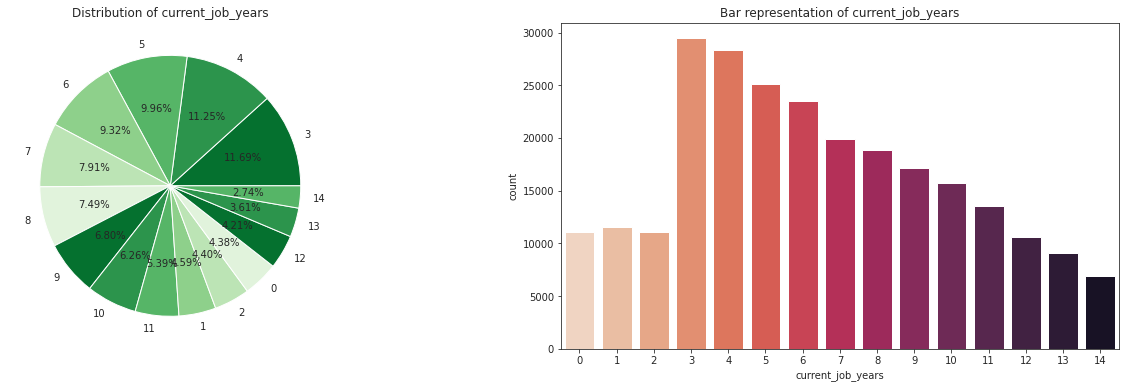

In [199]:
univariate('current_job_years')

Inferences:
- Most number of people have been working in the current job for 3 years.
- And as the number of years spent increases the count decreases.

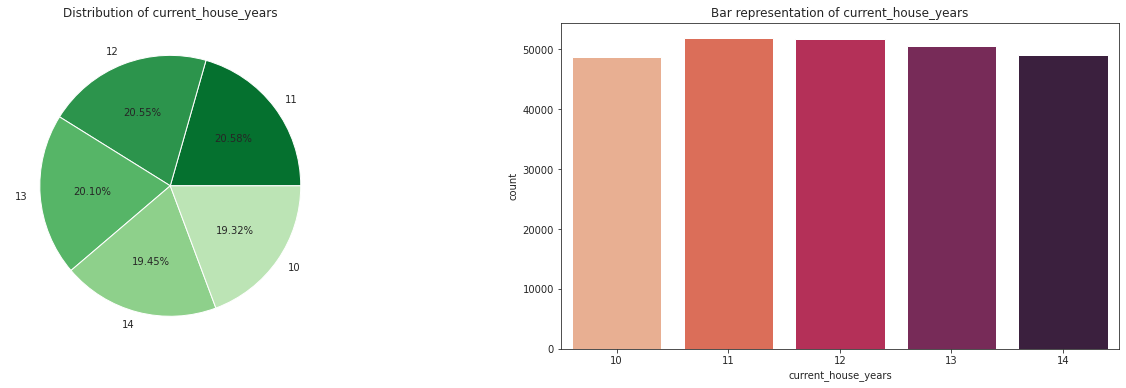

In [200]:
univariate('current_house_years')

inferences:
- Most of the people from which the data has been collected have been living in the same house for 11 years
- But there is not much of an increase of decrease between each years

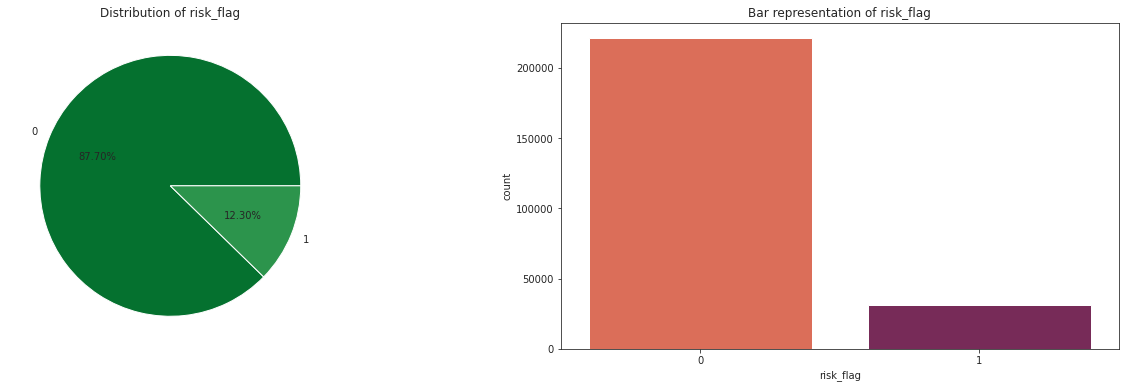

In [201]:
univariate('risk_flag')

Inferences:
- majority of the people did not defaulted on the loan which is quite expected since the ratio of defaulter is very less to begin with

#### -- Hypothesis of discrete features

#### 1st Hypothesis:
    
    H0 : the more year a person  living in the same house less the risk
    H1 : The more year a person  living in the same house more the risk

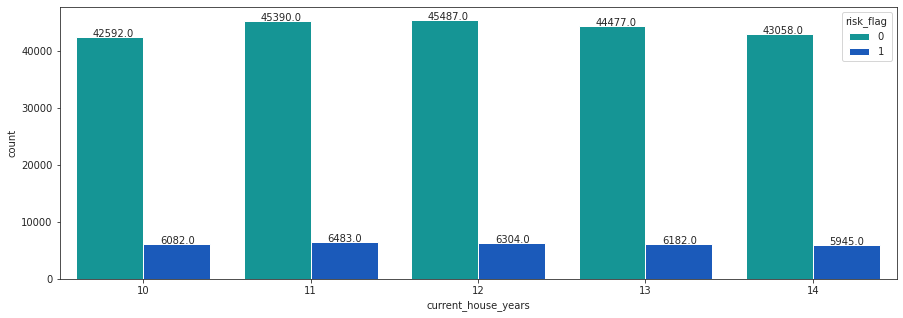

In [202]:
plt.figure(figsize =(15,5))
ax = sns.countplot(df['current_house_years'],hue=df['risk_flag'],palette = 'winter_r')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+0.01))

H0 : is accepted since as the more years a person spends in the current_house the count of risk decreases

#### 2nd Hypothesis:
   
    H0 : the more year a person spends in the current job less the risk
    H1 : The more year a person spends in the current job more the risk

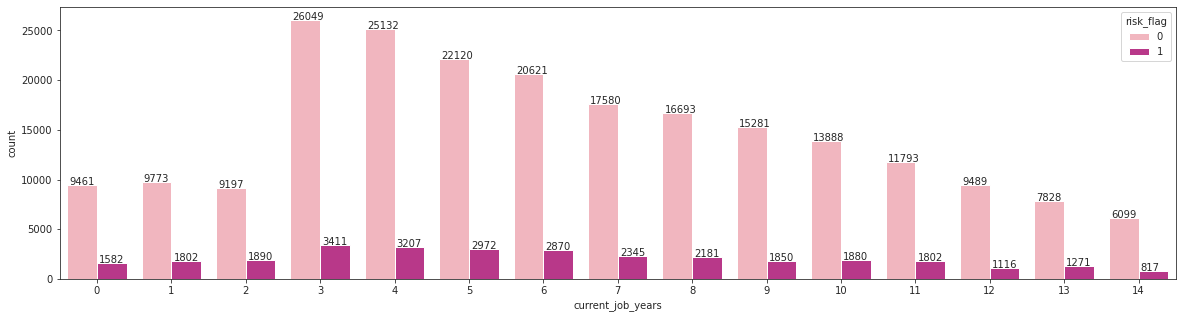

In [203]:
plt.figure(figsize =(20,5))
ax = sns.countplot(df['current_job_years'],hue=df['risk_flag'],palette = 'RdPu')

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.01))

H0: is accepted since the more years a person spends on his current job the risk count decreases.

#### 2.Continuos variables

- in contrast to discrete any features that has more unique values in it is called Continuos variables

In [204]:
continuos_features = [feature for feature in numerical_features if len(df[feature].unique())>20]
continuos_features

['income', 'age', 'experience']

#### -- Univariate analysis

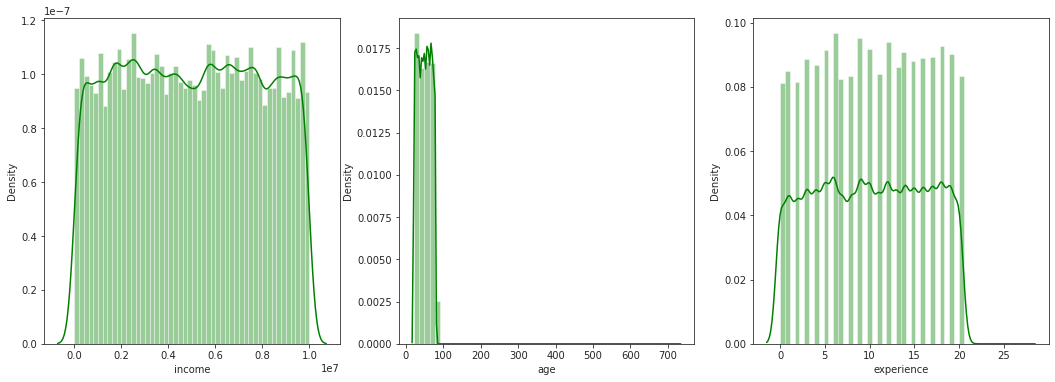

In [205]:
fig,ax = plt.subplots(1, 3, figsize=(18, 6))
for variable,subplot in zip(continuos_features,ax.flatten()):
  sns.distplot(df[variable],ax=subplot,color='green')

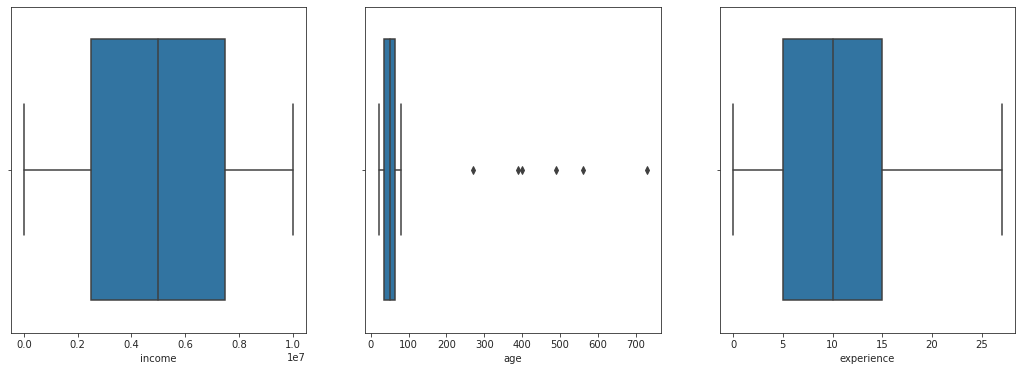

In [206]:
fig,ax = plt.subplots(1, 3, figsize=(18, 6))
for variable,subplot in zip(continuos_features,ax.flatten()):
  sns.boxplot(df[variable],ax=subplot)

Inferences:
- Income is normally distributed but we could do any kind of transfomation to make data even more evenly distributed
- Age has a lot of outliers which must be removed to make it normal
- experience does not have any outliers however is slightly right skewed we can do transformation on it

#### -- Hypothesis testing for continuos variables:




1st Hypothesis:

    H0 : if a person has higher income the risk is very less
    H1 : if a person has higher income the risk is very high

in order to test our hypothesis let us create 10 bins for our income tab which will be helpful

In [207]:
df['income_bins'] = pd.cut(x = df['income'],
                           bins=[0,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000],
                           labels = ['10l','20l','30l','40l','50l','60l','70l','80l','90l','1cr'])

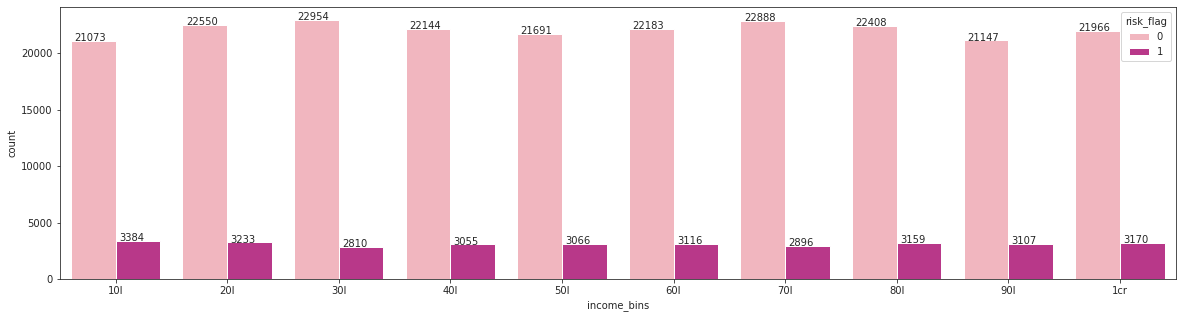

In [208]:
plt.figure(figsize =(20,5))
ax = sns.countplot(df['income_bins'],hue=df['risk_flag'],palette = 'RdPu')

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.01))

H1 : we will reject the null hypothesis(H0) because after the initial income tabs where we have a lot of defaulter,the risk does decrease but it again picks so we cannot be a 100% sure that those with higher income results in less risk.

#### 2nd Hypothesis    
    
    H0 : older a person is less chance there is of loan risk
    H1 : older a person is more chances of loan risk

since we have a lot of outliers present we will remove them,since in our dataset the highest plausible age is 80 we will take the .25 and .75 range

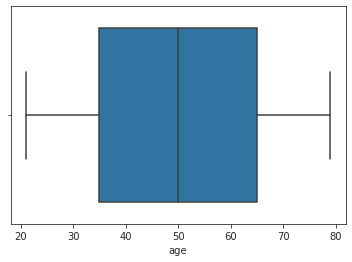

In [209]:
data = df.copy()
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(data['age'])
for i in data['age']:
    if i > Upper_tail or i < Lower_tail:
            data['age'] = data['age'].replace(i, m)
sns.boxplot(data['age'])

again we will create a new column for easier working

In [210]:
df['age_bins'] = pd.cut(x = df['age'],
                           bins=[21,31,41,51,61,71,81],
                           labels = ['21-31','31-41','41-51','51-61','61-71','71-81'])

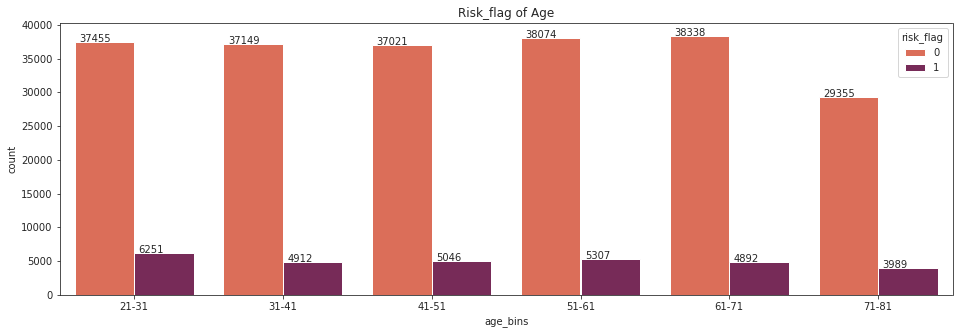

In [211]:
plt.figure(figsize=(16,5))
ax = sns.countplot(df['age_bins'],hue=df['risk_flag'],palette='rocket_r')
plt.title('Risk_flag of Age')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.01))

H1: we will reject the null hypothesis because in most financial institutions 60 is the minimum age for a loan,but even if it does provides there is not enough evidence to prove that higher age means less risk

#### 3rd Hypothesis

    H0 : more experience a person has the less risk
    H1 : more experience a person has higher the risk

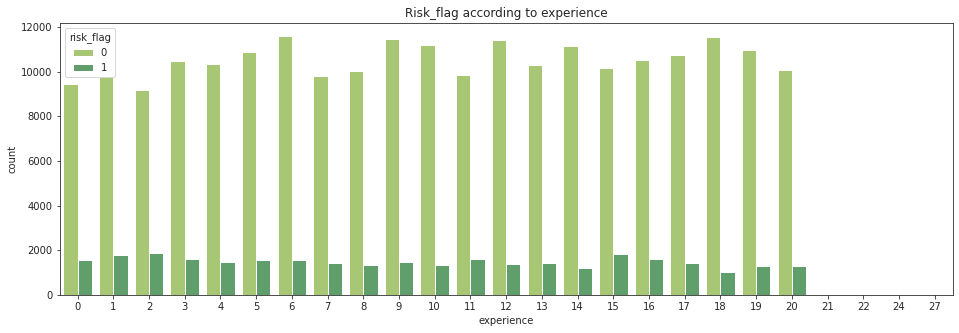

In [212]:
plt.figure(figsize=(16,5))
ax = sns.countplot(data['experience'],hue=df['risk_flag'],palette='summer_r')
plt.title('Risk_flag according to experience');

H1 : we will reject the null hypothesis(H0) even though there is a decrease in risk as experience increases it again picks up so there is not enough evidence to prove that more experience a person has less the risk

- even though we can remove those after the 20 experience data we will let it be as experience is one of the major factors when providing loan

### Step 4: Numerical Variables

In [213]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]
numerical_features

['marital_status',
 'house_ownership',
 'car_ownership',
 'profession',
 'city',
 'state']

In [214]:
for feature in numerical_features:
  print("--",feature,"has",len(df[feature].unique()),'unique values')

-- marital_status has 4 unique values
-- house_ownership has 3 unique values
-- car_ownership has 5 unique values
-- profession has 51 unique values
-- city has 317 unique values
-- state has 29 unique values


- we will drop the city since state can be used to represent the city
- we will rename all the shortcuts that have been created during data creation

In [215]:
df['marital_status'] = df['marital_status'].replace({'M':'married',
                                                     'S':'single'})
df['house_ownership'] = df['house_ownership'].replace({'norent_noown':'Not available'})
df['car_ownership']= df['car_ownership'].replace({'No':'no',
                                                  'YES':'yes',
                                                  'Y':'yes'})
df['state'] = df['state'].replace({'Uttar_Pradesh[5]':'Uttar_Pradesh'})

- let us create a new feature which will contain the grouped professoions

In [216]:
technical = ['Mechanical_engineer','Software_Developer','Chemical_engineer','Biomedical_Engineer','Computer_hardware_engineer',
'Petroleum_Engineer','Computer_operator','Technician','Engineer','Analyst','Statistician','Civil_engineer','Industrial_Engineer',
'Technology_specialist','Surveyor','Aviator']

support = ['Librarian','Flight_attendant','Hotel_Manager','Secretary','Firefighter','Consultant','Technical_writer','Air_traffic_controller']

government = ['Civil_servant','Economist','Politician','Police_officer','Army_officer','Official']

arts_and_design = ['Architect','Artist','Designer','Design_Engineer','Comedian','Graphic_Designer','Fashion_Designer','Drafter','Web_designer']

healthcare = ['Physician','Dentist','Microbiologist','Surgeon','Psychologist','Scientist']

finance_and_law =['Financial_Analyst','Chartered_Accountant','Lawyer','Magistrate']

others =['Geologist','Chef']

- let us create a new column from which we will create our new feature

In [217]:
df['new_profession'] = df['profession']

In [218]:
def replace(feature1,feature2):
  df['new_profession'] = df['new_profession'].replace(dict.fromkeys(feature1,feature2))

In [219]:
replace(technical,'technical')
replace(support,'support')
replace(government,'government')
replace(arts_and_design,'arts_and_design')
replace(healthcare,'healthcare')
replace(finance_and_law,'finance_and_law')
replace(others,'others')

In [220]:
df.new_profession.unique()

array(['technical', 'support', 'government', 'arts_and_design',
       'healthcare', 'finance_and_law', 'others'], dtype=object)

#### -- Univariate Analysis

In [221]:
def univariate_categorical(feature):  
  plt.figure(figsize = (20,6))
  plt.subplot(1,2,1)
  plt.pie(df[feature].value_counts(), 
          labels=df[feature].value_counts().index, 
          colors=sns.color_palette('tab10'), 
          autopct='%.2f%%')
  centre=plt.Circle((0,0),0.5,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre)
  plt.title('Distribution of {}'.format(feature))

  plt.subplot(1,2,2)
  sns.countplot(df[feature],palette= 'winter_r',order = df[feature].value_counts().index)
  plt.title('Bar representation of {}'.format(feature))
  plt.show()

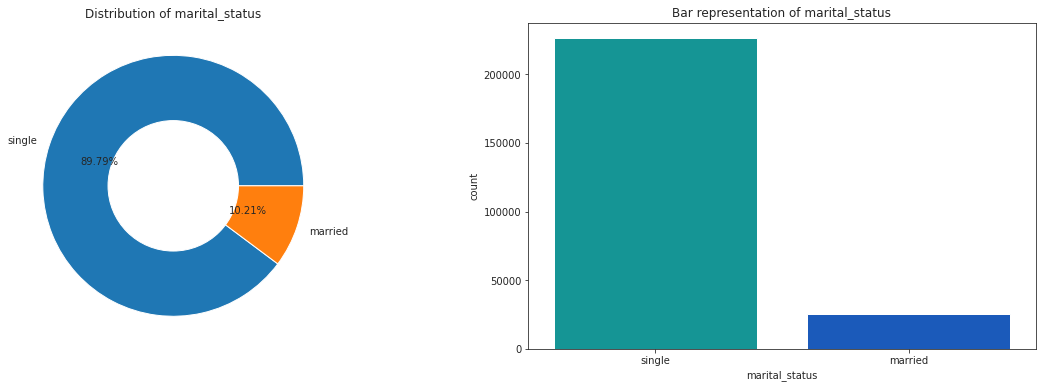

In [222]:
univariate_categorical('marital_status')

Inferences:
- most of the people from which the data was collected had a marital staus of single

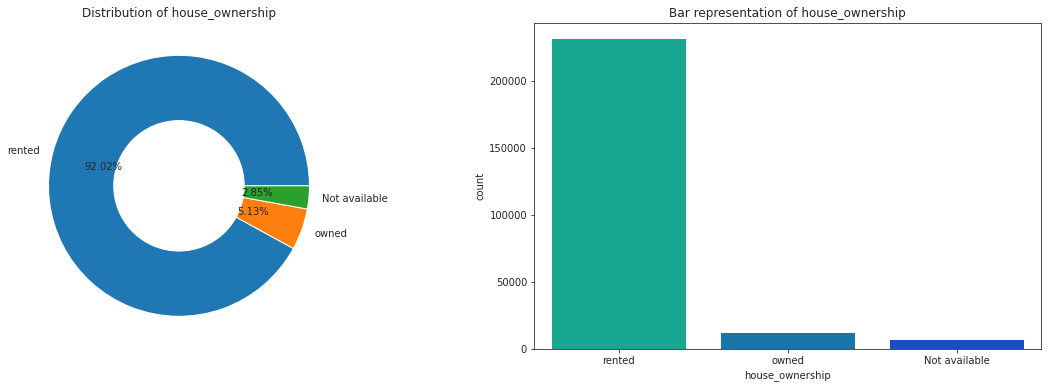

In [223]:
univariate_categorical('house_ownership')

Inferences:
- Most people in the collected dataset were living in a rented house

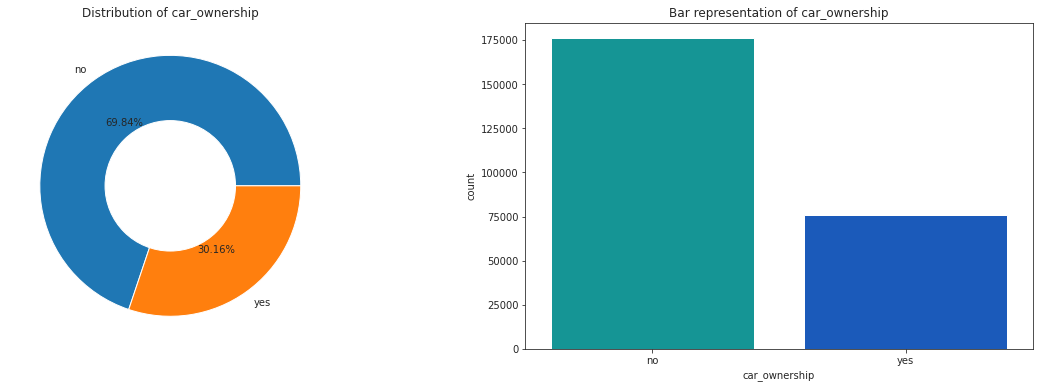

In [224]:
univariate_categorical('car_ownership')

Inferences:
- Majority of the people did not own a car in the collected dataset

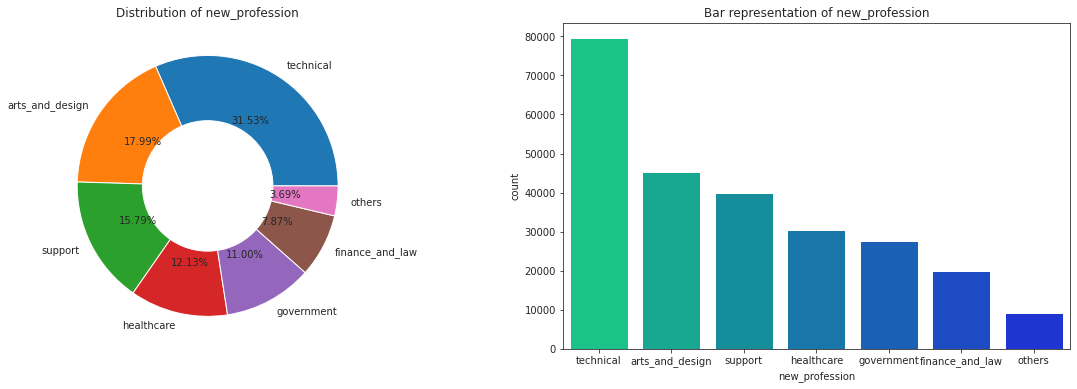

In [225]:
univariate_categorical('new_profession')

Inferences:
- most people had a technical job,followed by job involving design and arts
- which was followed by people having support jobs
- for further details about what jobs they were we can check above

Text(0.5, 1.0, 'Distribution of State')

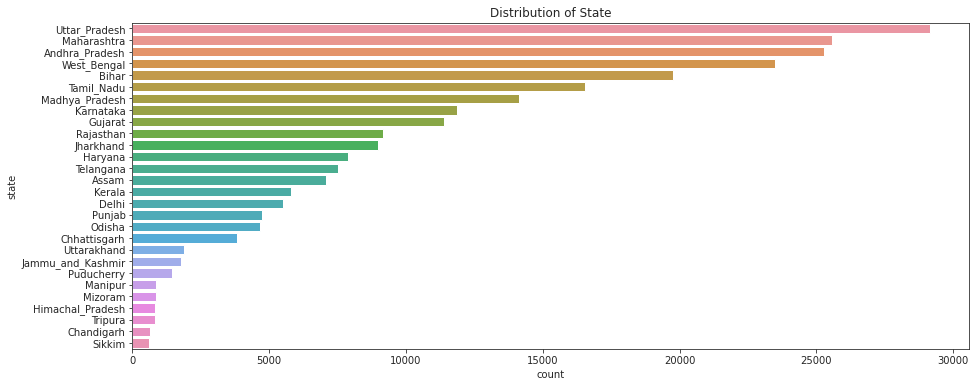

In [226]:
plt.figure(figsize=(15,6))
sns.countplot(y=df['state'],order = df['state'].value_counts().index)
plt.title('Distribution of State')

Inferences:
- Most of the data collected belonged to people from Uttar_pradesh,followed by Maharastra
- which was followed by Andra_pradesh
- least was from sikkim,chandigarh and tripura

- even though we will not be considering city let us which were the top 10 city by count

In [227]:
city_count = df.groupby(['city']).size().reset_index()
city_count = city_count.rename(columns = {0:"Count"})
city_count = city_count.sort_values(by='Count',ascending=False).head(15)
city_count = city_count.replace({'Saharsa[29]':'Saharsa',
                                 'Hajipur[31]':'Hajipur',
                                 'Erode[17]':'Erode'})
city_count

,city,Count
312,Vijayanagaram,1259
53,Bhopal,1208
64,Bulandshahr,1185
256,Saharsa,1180
313,Vijayawada,1172
281,Srinagar,1136
126,Indore,1130
214,New_Delhi,1098
113,Hajipur,1098
262,Satara,1096


Text(0.5, 1.0, 'Distribution by city')

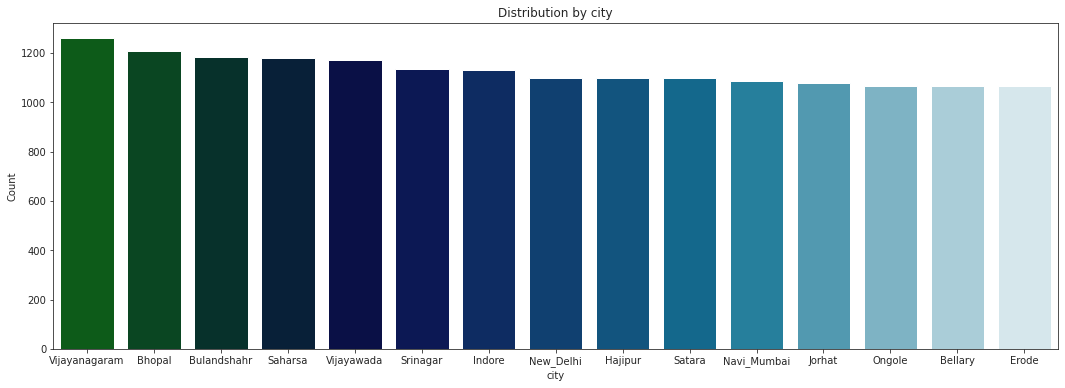

In [228]:
plt.figure(figsize=(18,6))
sns.barplot(x =city_count['city'],y=city_count['Count'],palette ='ocean')
plt.title('Distribution by city')

Inferences :
- The highest data count according to city is from vijayanagaram,followed by bhopal and Bulandshahr

#### let us see which cities has the highest defaulters and highest non-defaulters

In [229]:
total_risk_count = df.groupby(['city','risk_flag']).size().reset_index()

non_risk_count = total_risk_count[total_risk_count['risk_flag']==0]
non_risk_count = non_risk_count.rename(columns={0:'count'}).sort_values(by='count',ascending=False).head(10)
non_risk_count = non_risk_count.replace({'Saharsa[29]':"Saharsa"})

risk_count = total_risk_count[total_risk_count['risk_flag']==1]
risk_count = risk_count.rename(columns={0:'count'}).sort_values(by='count',ascending=False).head(10)
risk_count = risk_count.replace({'Buxar[37]':"Buxar"})


#### Below is the both risk and non risk side by side for comparison purpose

In [271]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [272]:
display_side_by_side([non_risk_count,risk_count], ['Non_risk_dataframe', 'Risk_dataframe'])

,city,risk_flag,count
624,Vijayanagaram,0,1110
512,Saharsa,0,1067
128,Bulandshahr,0,1061
106,Bhopal,0,1042
626,Vijayawada,0,1025
428,New_Delhi,0,1024
76,Bellary,0,992
68,Bareilly,0,992
524,Satara,0,992
278,Jodhpur,0,974


Text(0.5, 1.0, 'Non_risk_count according to cities')

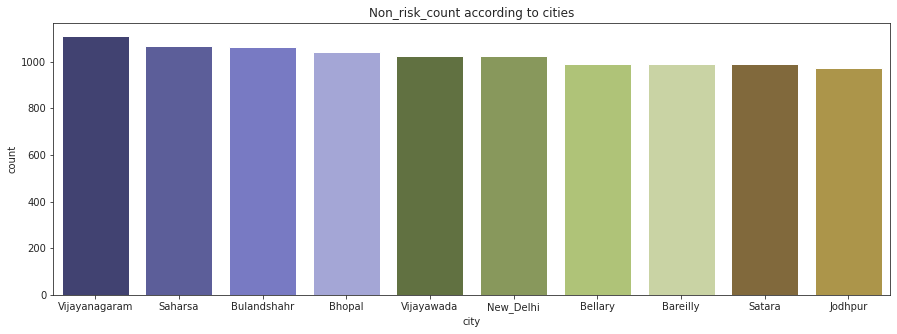

In [232]:
plt.figure(figsize=(15,5))
sns.barplot(x = non_risk_count['city'],y = non_risk_count['count'],palette='tab20b')
plt.title('Non_risk_count according to cities')

Inferences:
- even though there is not a very huge difference between each cities,vijayanagaram tops the list of non-risk-count
- followed by saharsa and bulandshahr

Text(0.5, 1.0, 'risk_count according to cities')

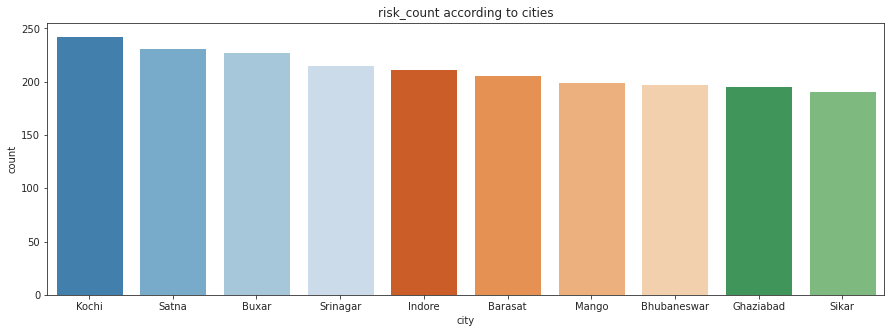

In [233]:
plt.figure(figsize=(15,5))
sns.barplot(x =risk_count['city'],y =risk_count['count'],palette='tab20c')
plt.title('risk_count according to cities')

Inferences:
- Kochi tops the list of highest risk_flag followed by satna and buxar


#### Hypothesis testing for Categorical data

1st Hypothesis:

    H0 : The higher the position a person is in less the risk
    H1 : The higher the position a person is in more the risk

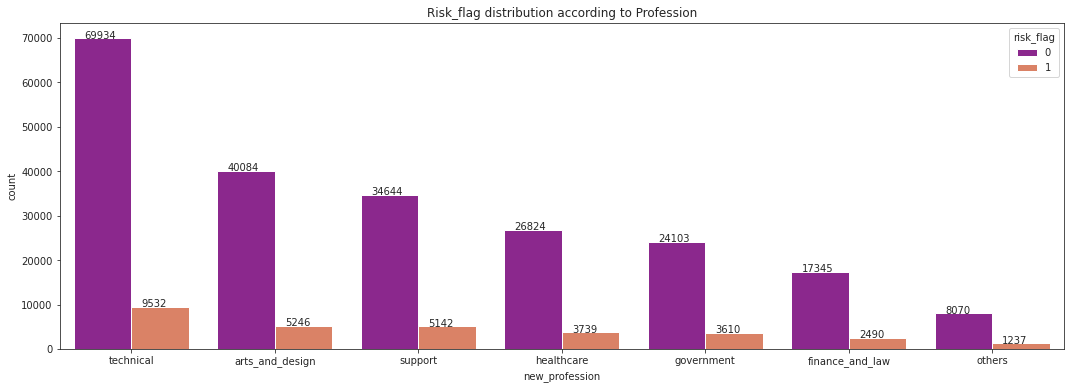

In [234]:
plt.figure(figsize=(18,6))
ax = sns.countplot(df['new_profession'],hue=df['risk_flag'],order = df['new_profession'].value_counts().index,palette ='plasma')
plt.title('Risk_flag distribution according to Profession')

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+0.01))

- H0: we accept the null hypothesis because as we can see the higher the positions get the risk decreases
- others will not be considered in here because it is jobs for which we could not find any suitable type

#### 2nd Hypothesis

    H0: If a person is married the risk is less
    H1: If a person is married the risk is high

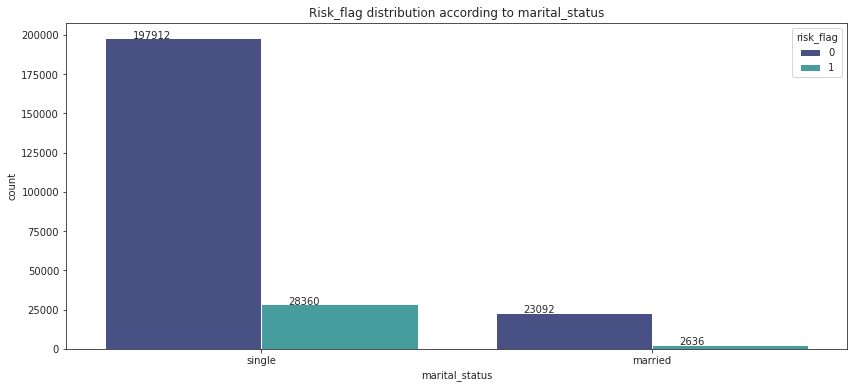

In [235]:
plt.figure(figsize=(14,6))
ax = sns.countplot(df['marital_status'],hue=df['risk_flag'],palette ='mako')
plt.title('Risk_flag distribution according to marital_status')

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+0.01))

H0 : Even though most of the people in our dataset are single we will still accept the null hypothesis, since if a person is married the risk is less

#### 3rd Hyothesis:

    H0: if a person owns a car or a house the risk is very less
    H1: if a person owns a car or a house the risk is very high

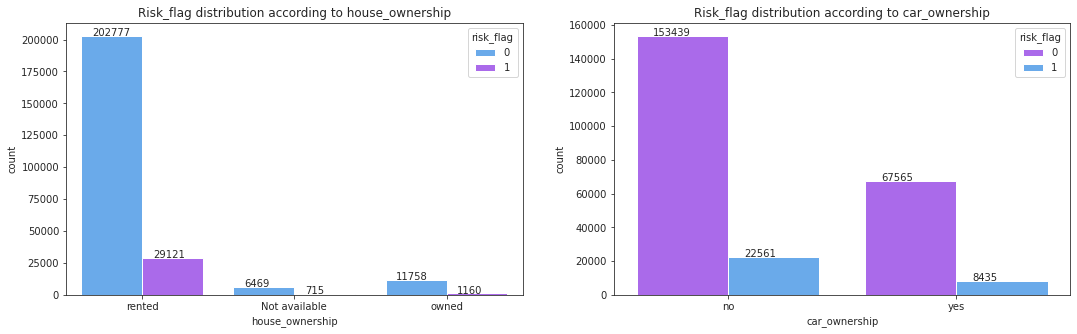

In [236]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
ax = sns.countplot(df['house_ownership'],hue=df['risk_flag'],palette ='cool')
plt.title('Risk_flag distribution according to house_ownership')

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+0.01))

plt.subplot(1,2,2)
ax = sns.countplot(df['car_ownership'],hue=df['risk_flag'],palette ='cool_r')
plt.title('Risk_flag distribution according to car_ownership')

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+0.01))


- H0 : we will accept the null hypothesis,since in both the cases if a person owns a car/house the risk involved is less

#### 4th hypothesis:

    H0: if a person lives in a top state the risk is less
    H1 : if a person lives in a  top state the risk is high

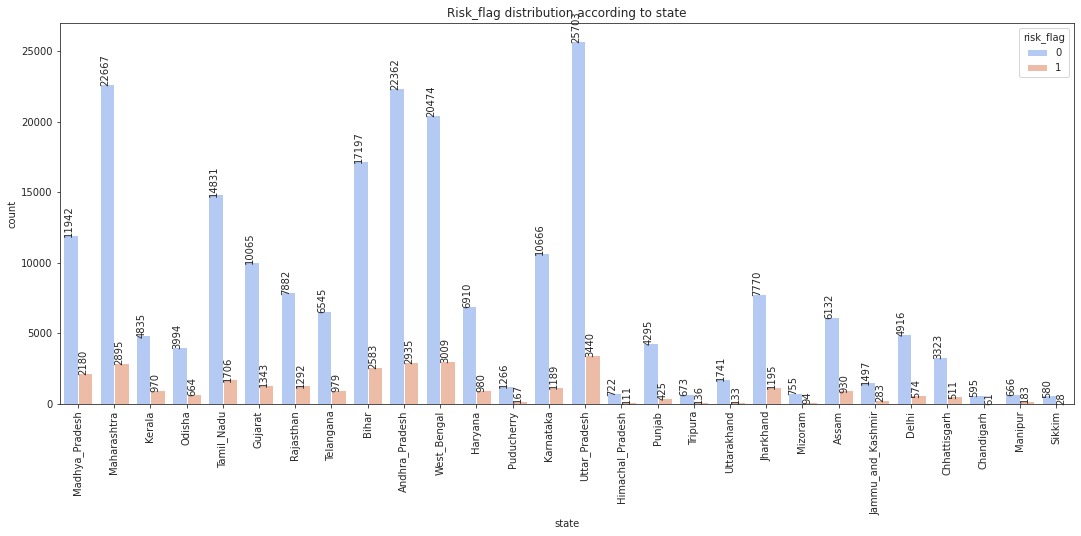

In [237]:
plt.figure(figsize=(40,7))
plt.subplot(1,2,1)
ax = sns.countplot(df['state'],hue=df['risk_flag'],palette ='coolwarm')
plt.title('Risk_flag distribution according to state')
plt.xticks(rotation='vertical')

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.18),rotation ='vertical')

- this hypothesis can not be considered valid because there is no measurement to measure whether one state is porsche or not

### Let us what else we can find out about our dataset

#### Q1:what was the marital_status and profession across ages ? 

Text(0.5, 1.0, 'Profession across ages')

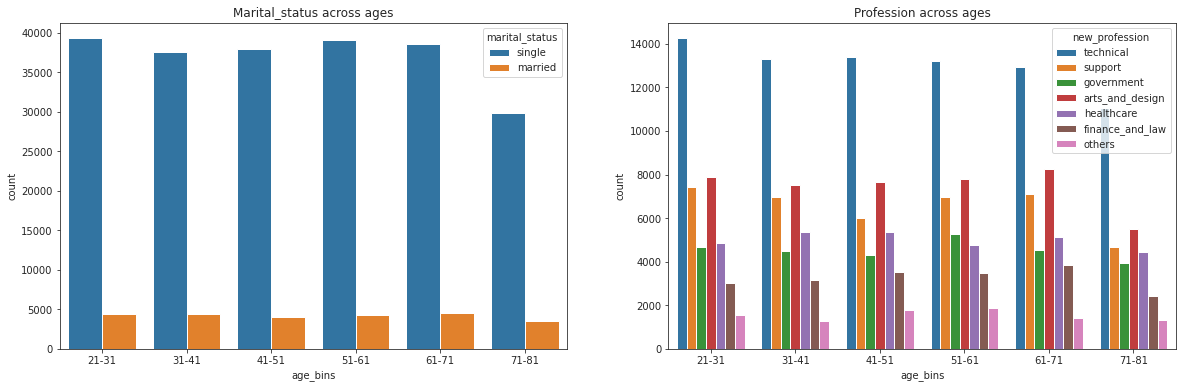

In [238]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(df['age_bins'],hue=df['marital_status'])
plt.title('Marital_status across ages')

plt.subplot(1,2,2)
sns.countplot(df['age_bins'],hue=df['new_profession'])
plt.title('Profession across ages')

Inferences:
- This comes to us as a surprise because in a country like India most people get married by the age of 40 but in the data we have most people who are not married even after the age of 50.
    - if there is no mistakes in data typing or collection that is a surprise.
- most people opt for technical jobs followed by arts and design jobs which is then followed by support, below we can see which age group chose which profession the most
    - technical : 21-31
    - support : 61-71
    - government : 51-61
    - arts_and_design : 61-71 and 21-31
    - healthcare :31-41
    - finance_and_law- 41-51
    - others -41-51 and 31-41

#### Q2: Across age what was the age and car ownership age?

Text(0.5, 1.0, 'house ownership across ages')

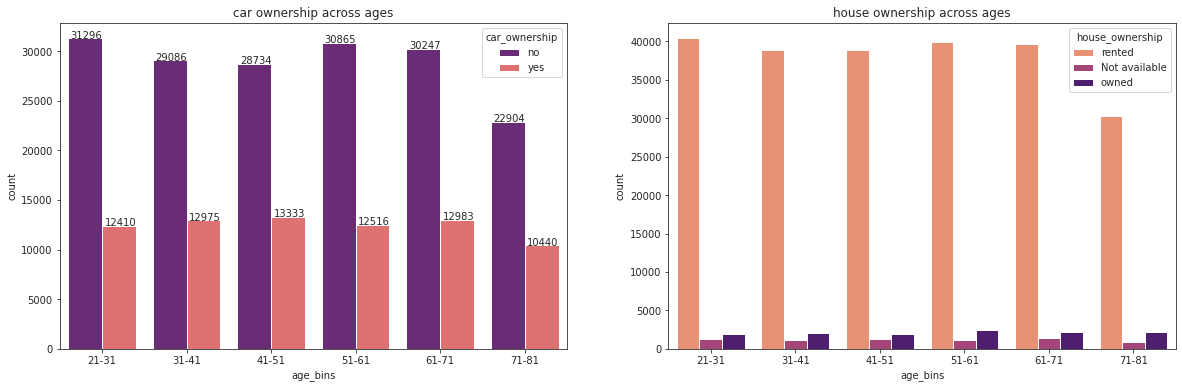

In [239]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax = sns.countplot(df['age_bins'],hue=df['car_ownership'],palette='magma')
plt.title('car ownership across ages')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.01))

plt.subplot(1,2,2)
ax2 = sns.countplot(df['age_bins'],hue=df['house_ownership'],palette='magma_r')
plt.title('house ownership across ages')

Inferences:
- we can say that most people will have car after the age of 40 since after that age the count increases,but the ratio of own:no_own of car is still very high since most people do not own a car.
- coming to house is also the same scenario most people will have house after the age of 50,again the ratio of own:no_own is stil very high.
- most people can afford to buy a car and  not a house which is quite understandable since the cost of buying a house is very high

#### Q3:At each income range what is the ratio of buying a car or a house?

Text(0.5, 1.0, 'house ownership across income')

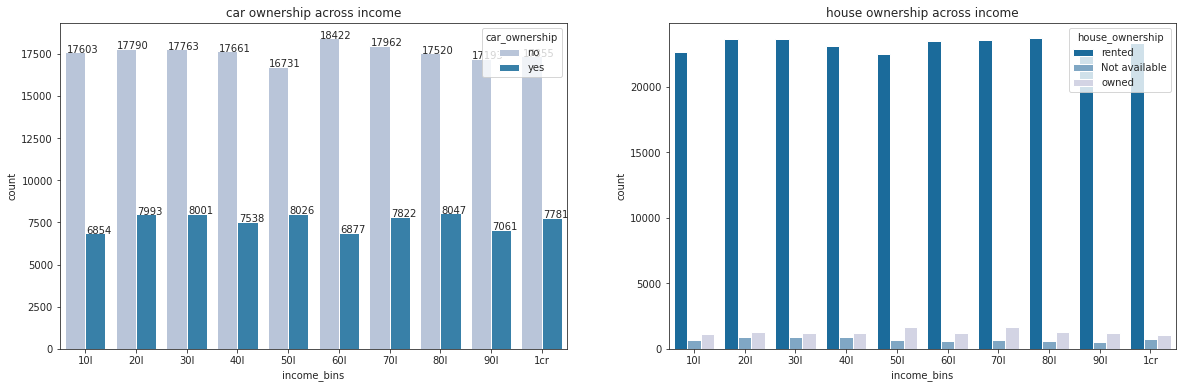

In [240]:
plt.figure(figsize=(20,6))
sns.set_style('ticks')
plt.subplot(1,2,1)
ax = sns.countplot(df['income_bins'],hue=df['car_ownership'],palette='PuBu')
plt.title('car ownership across income')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.01))

plt.subplot(1,2,2)
ax2 = sns.countplot(df['income_bins'],hue=df['house_ownership'],palette='PuBu_r')
plt.title('house ownership across income')

Inferences:
- there is no definite income tab which tells us that the person will own a car,people across any income may own a car
- but we can say that as the income increases so does the slight chance of a person buying an house
- again the ratio of own:no_own is very high

#### Q4 :Is there any increse or decrease in ownership of car and house based on a persons marital status ?

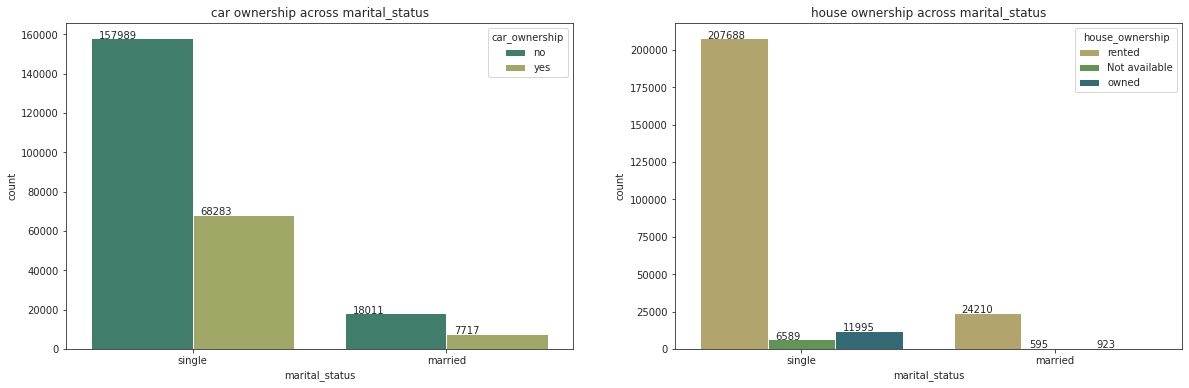

In [241]:
plt.figure(figsize=(20,6))
sns.set_style('ticks')
plt.subplot(1,2,1)
ax = sns.countplot(df['marital_status'],hue=df['car_ownership'],palette='gist_earth')
plt.title('car ownership across marital_status')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.01))

plt.subplot(1,2,2)
ax2 = sns.countplot(df['marital_status'],hue=df['house_ownership'],palette='gist_earth_r')
plt.title('house ownership across marital_status')
for p in ax2.patches:
   ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.01))

inferences:
- even though there is a disparity in the count between single and married
- whether a person is married or not there is equal chance they could own a car.
- but in case of owning a house it seems most people prefer to own a house before getting married

#### Q5: Is there really a relation between increase in experience and income ?

Text(0.5, 1.0, 'Relation between income and experience')

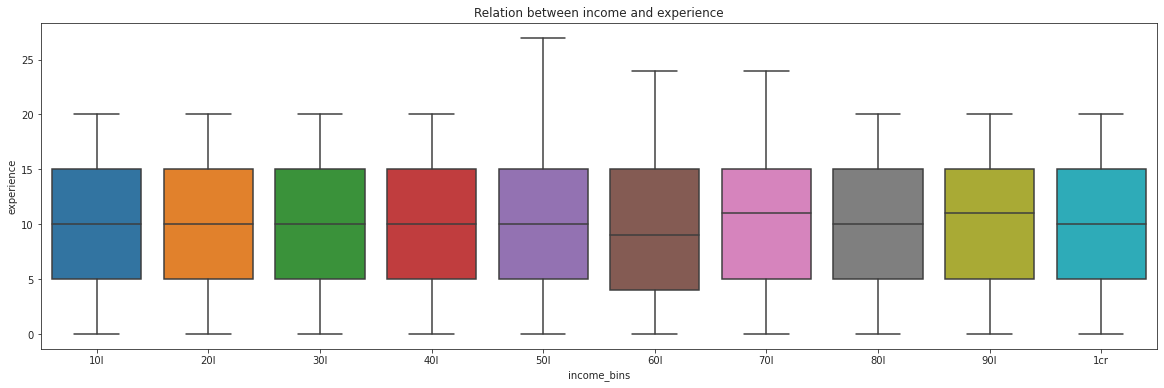

In [254]:
plt.figure(figsize=(20,6))
sns.boxplot(x = 'income_bins',y='experience',data=df)
plt.title('Relation between income and experience')

inferences:
- median value is same till the 40L bin after which there is variance, so we can say till 40l there is practically no changes in the experience vs income
- we can say those who have more than 20 years of experience has a salary of 50l and above
- But after some income bins it again becomes as before
- so statistically there is not enough evidence to show that there is a relation between the increase in experience and income

      so we can say with age experience does come but not income

#### Q6: which state owns the most car and house?

Text(0.5, 1.0, 'car ownership across state')

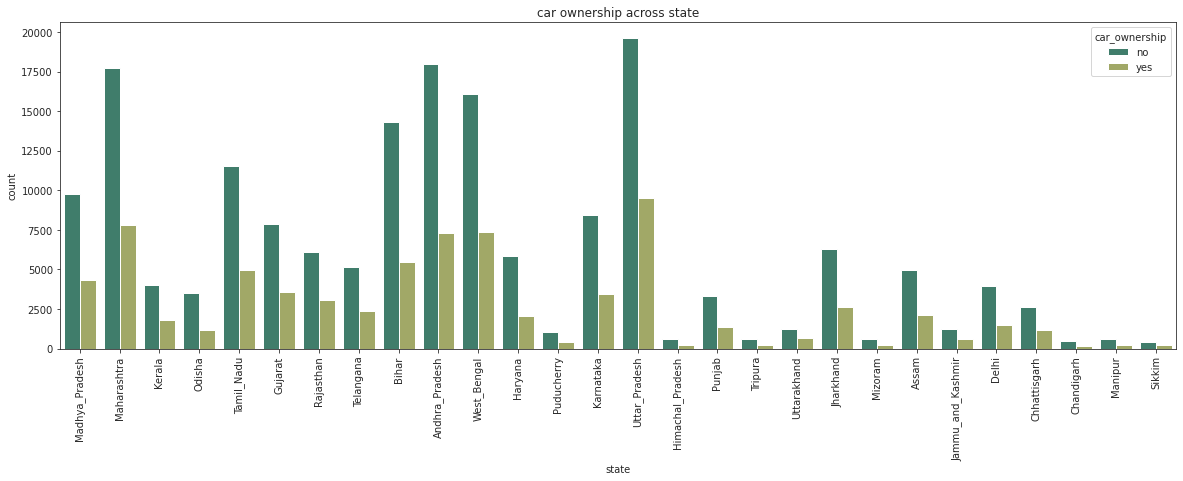

In [243]:
plt.figure(figsize=(20,6))
ax = sns.countplot(df['state'],hue=df['car_ownership'],palette='gist_earth')
plt.xticks(rotation='vertical')
plt.title('car ownership across state')
# for p in ax.patches:
#    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.01))

Inferences:
- most car is owned by Uttar_pradesh,followed by Maharastra,and Andra_pradesh
- least cars is owned by chadigarh,followed by sikkim and himachal_pradesh  

Text(0.5, 1.0, 'house ownership across state')

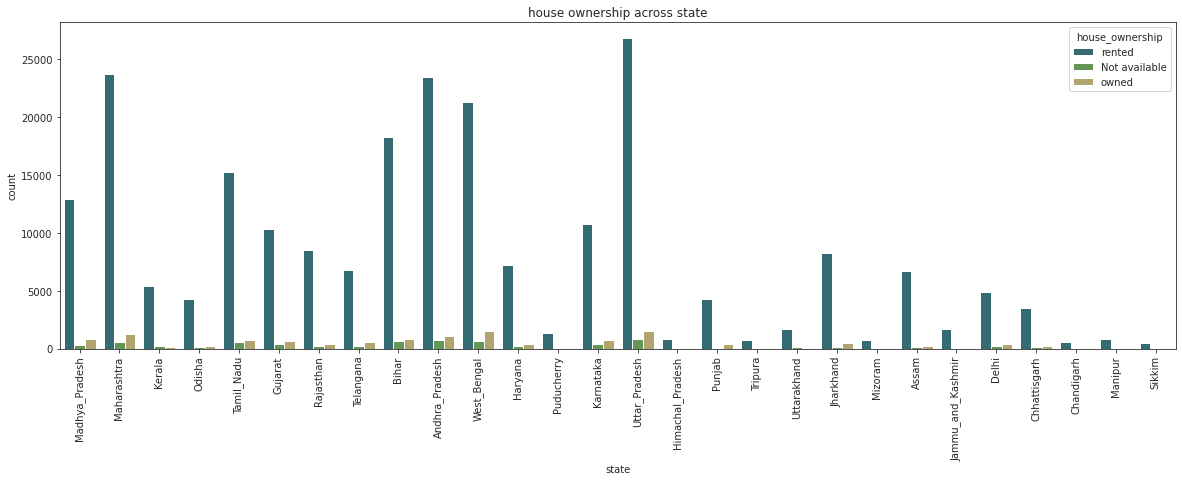

In [244]:
plt.figure(figsize=(20,6))
ax = sns.countplot(df['state'],hue=df['house_ownership'],palette='gist_earth')
plt.xticks(rotation='vertical')
plt.title('house ownership across state')
# for p in ax.patches:
#     ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+0.01))

Inferences:
- most houses is owned by Uttar_pradesh,Maharastra and west_bengal
- least houses is owned by chandigarh.manipur and himachalpradesh

#### Q6: Is there any relation between the age of a person and his current_job and current_house ?

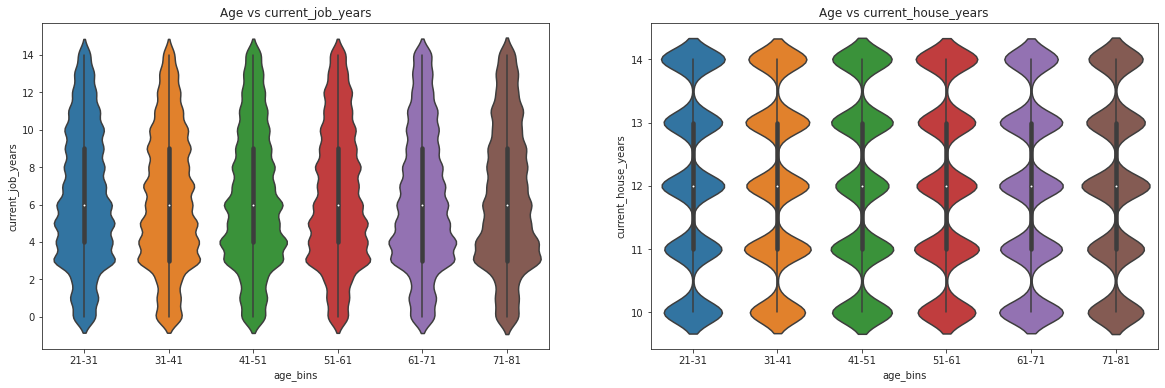

In [245]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.violinplot('age_bins','current_job_years',data=df)
plt.title('Age vs current_job_years');

plt.subplot(1,2,2)
sns.violinplot('age_bins','current_house_years',data=df)
plt.title('Age vs current_house_years');

Inferences:
- There is actually no realtionship between a person's age and them owning a house or staying in the same job

#### Q7: Which profession is more in which state?

In [246]:
city_profession = df.groupby(['state','new_profession']).size().reset_index()
city_profession = city_profession.rename(columns ={0:'count'})

- let us create a function to calculate the values

In [252]:
def city_counts(variable,feature):
  variable = city_profession[city_profession['new_profession']==feature]
  variable = variable.rename(columns ={0:'count'}).sort_values(by='count',ascending=False).head(10)
  plt.pie(x = variable["count"],labels =variable["state"],
        colors=sns.color_palette('Spectral'), 
        autopct='%.2f%%')
  plt.title('Distribution of {} jobs by cities '.format(feature));

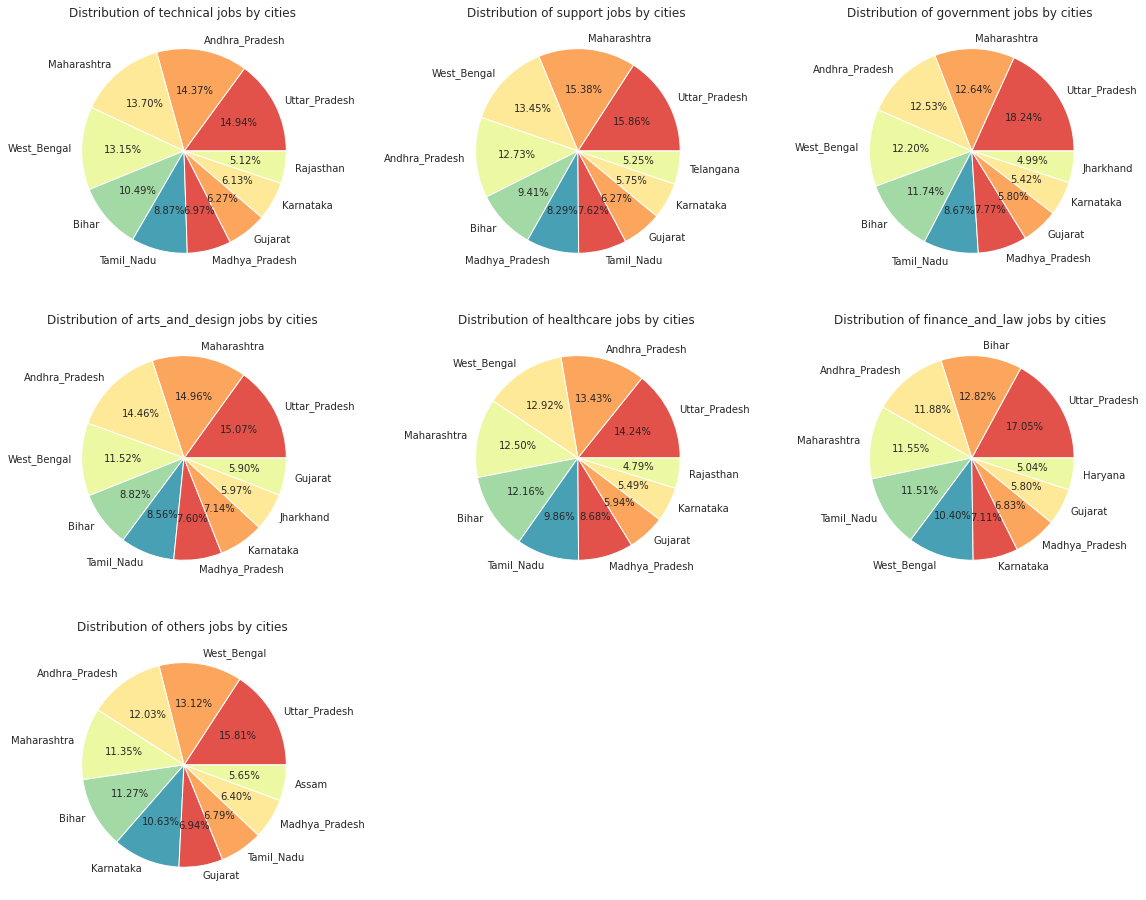

In [253]:
plt.figure(figsize=(20,16))
plt.subplot(3,3,1)
city_counts(technical,'technical')

plt.subplot(3,3,2)
city_counts(support,'support')

plt.subplot(3,3,3)
city_counts(government,'government')

plt.subplot(3,3,4)
city_counts(arts_and_design,'arts_and_design')

plt.subplot(3,3,5)
city_counts(healthcare,'healthcare')

plt.subplot(3,3,6)
city_counts(finance_and_law,'finance_and_law')

plt.subplot(3,3,7)
city_counts(others,'others');

Inferences:
- above we can see the distribution of each type of jobs according to the city

#### Q8: Is there any relation between a person income and his marital_status ?

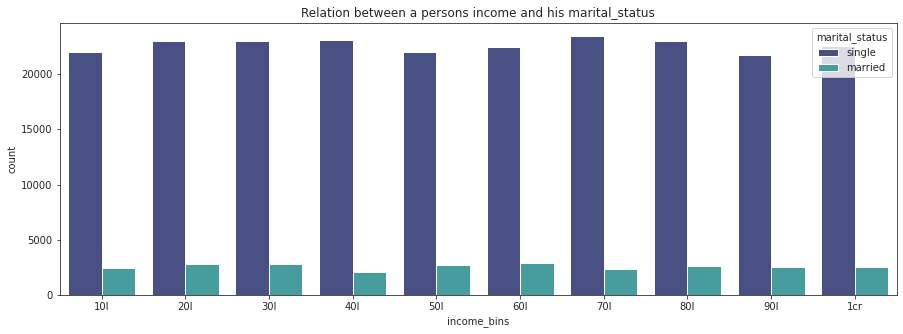

In [261]:
plt.figure(figsize=(15,5))
sns.countplot(df['income_bins'],hue=df['marital_status'],palette = 'mako')
plt.title("Relation between a persons income and his marital_status");

Inferences:
- we cannot be exactly sure that there is a relation between a person's income and marital_status since there is neither an uphill nor a downhill trend

#### Q9: Is there any relation between a persons age and his income?

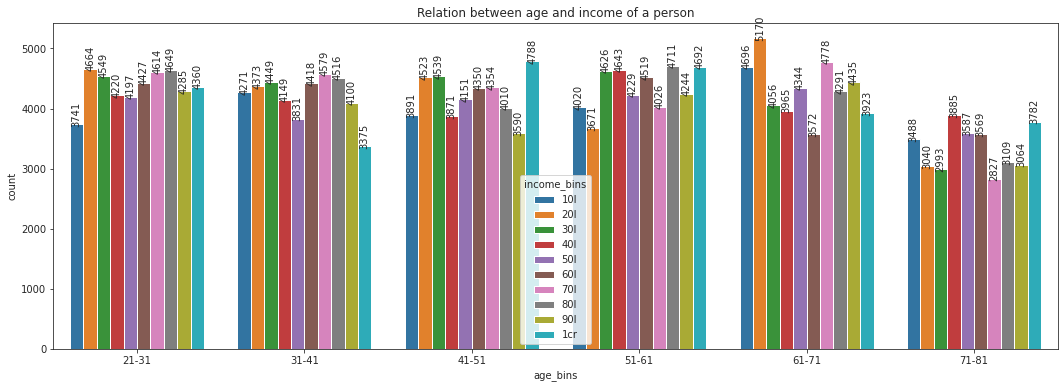

In [270]:
plt.figure(figsize=(18,6))
ax =sns.countplot(df['age_bins'],hue=df['income_bins'],palette = 'tab10')
plt.title('Relation between age and income of a person')
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.18),rotation ='vertical');

Inferences:
- 0-10l  : is earned most by people aged 61-71
- 10-20l : is earned most by people aged 61-71
- 20-30l : is earned most by people aged 51-61
- 30-40l : is earned most by people aged 51-61
- 40-50l : is earned most by people aged 61-71  
- 50-60l : is earned most by people aged 51-61
- 60-70l : is earned most by people aged 61-71
- 70-80l : is earned most by people aged 51-61
- 80-90l : is earned most by people aged 61-71
- 90 -1cr : is earned most by people aged 41-51

That came as a surprise because across all income tabs those that got the highest were between age 40-70,of course even though this data doesnt represent the entire population in our dataset this is the result.

### That concludes our analysis of Loan_Risk_Flag

In [273]:
df.to_csv('loan_preprocess.csv',index=False)